In [1]:
import numpy as np

from matplotlib import pyplot as plt
import matplotlib.transforms as mtransforms

from SettingPLOTs import *

pathfig = '/home/marvyn/GDrive/marvyn.inga@gmail.com/LPD_IFGW_UNICAMP/PhD-jupyter-notebooks/Figures/'

### Cavity transmission:

$$T(\omega) = 1 + \sum_{j=1}^{N}\frac{4 \eta_j (\eta_j-1)\kappa_j^2}{\kappa_j^2 + 4(\omega-\omega_j)^2}$$

where $N$ is the number of resonances and ($\omega_j$, $\eta_j$, $\kappa_j$) corresponde to each resonance.

In [2]:
def Transmission(ω, ωj, ηj, κj):
    """
    All input parameters are vectors.
    Return the cavity normalized transmission.
    """
    T = 1
    for ωj, ηj, κj in zip(ωj, ηj, κj):
        T = T + 4*ηj*(ηj-1)*κj**2 / (κj**2 + 4*(ω-ωj)**2)
    return T

### 1 peak

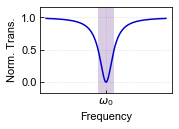

In [3]:
ωi, ωf, Δω = 192, 198, 1e-2 # Frequency in THz

ω = np.arange(ωi, ωf, Δω)

N = 1 # Number of resonances
ωj = [(ωf+ωi)/2]
ηj = [0.5]
κj = [0.8]

fig, ax = plt.subplots(figsize=cm2inch(6,4))

T = Transmission(ω,ωj,ηj,κj)
ax.plot(ω, T, c='mediumblue')

trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between(ω, -0.1, 1.1, where=T<=0.5, facecolor='indigo', alpha=0.2, transform=trans)

ax.set_xlabel('Frequency')
ax.set_ylabel('Norm. Trans.')

plt.xticks(ωj, [r'$ω_0$'])
# plt.savefig(pathfig+'Cavity-transmission-1-peak.svg')
plt.show()

### 2 peaks

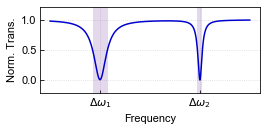

In [20]:
ωi, ωf, Δω = 190, 210, 1e-2 # Frequency in THz

ω = np.arange(ωi, ωf, Δω)

N = 2 # Number of resonances
δ = 5 # Avoid peaks in the extremes of the intervale of frequencies.
ωj = np.linspace(ωi+δ, ωf-δ, N)
ηj = [0.5, 0.5] # We are choosing the same ηj for all resonances.
κj = [1.5, 0.5] # We are choosing the same κj for all resonances.

label = []
for ii in range(N):
    label.append(r'$Δω_{}$'.format(ii+1))

fig, ax = plt.subplots(figsize=cm2inch(10,4))

T = Transmission(ω,ωj,ηj,κj)
ax.plot(ω, T, c='mediumblue')

import matplotlib.transforms as mtransforms
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between(ω, -0.15, 1.15, where=T<=0.5, facecolor='indigo', alpha=0.15, transform=trans)

ax.set_xlabel('Frequency')
ax.set_ylabel('Norm. Trans.')
# ax.set_yticks([])

plt.xticks(ωj, label)
plt.savefig(pathfig+'Cavity-transmission-2-peaks.svg')
plt.show()

In [5]:
stop

NameError: name 'stop' is not defined

### 3 peaks

In [ ]:
ωi, ωf, Δω = 190, 210, 1e-2 # Frequency in THz

ω = np.arange(ωi, ωf, Δω)

N = 3 # Number of resonances
δ = 4 # Avoid peaks in the extremes of the intervale of frequencies.
ωj = np.linspace(ωi+δ, ωf-δ, N)
ηj = 0.5*np.ones(N) # We are choosing the same ηj for all resonances.
κj = 0.5*np.ones(N) # We are choosing the same κj for all resonances.

label = []
for ii in range(N):
    label.append(r'$ω_{}$'.format(ii+1))

fig, ax = plt.subplots(figsize=cm2inch(13,4))

T = Transmission(ω,ωj,ηj,κj)
ax.plot(ω, T, c='mediumblue')
ax.vlines(ωj, -0.5, 1.1, ls=':', lw=1.2, alpha=0.6)

import matplotlib.transforms as mtransforms
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between(ω, -0.5, 1.1, where=T<=0.5, facecolor='slateblue', alpha=0.2, transform=trans)

ax.set_xlabel('Frequency')
ax.set_ylabel('Transmission')
ax.set_yticks([])

plt.xticks(ωj, label)
# plt.savefig(pathfig+'Cavity-transmission-3-peaks.svg')
plt.show()

### Eccentricity splitting:

$$\frac{\Delta\omega_\text{ecc}}{\omega_{nlm}} = -\frac{\epsilon}{6}\left(1-3\frac{|m|^2}{l(l+1)}\right)$$

In [ ]:
def Splitting(R, ϵ, l):
    FSR = c / (2*pi*SiO2().n(1550)*R)
    ω0 = 1e-12 * l * FSR # in THz
    Δω = []
    for ii in np.arange(l):
        Δω.append(ω0 - ω0 * (ϵ/6) * (1-3*np.power(ii, 2)/(l*(l+1))))
    return Δω

# Example
lex = 100
plt.plot(np.arange(lex), Splitting(10e-6, 0.01, lex), 'o', label = '$ω_0$ = {:3.2f} THz'.format(Splitting(125e-6, 0, lex)[0]), markersize = 10, alpha = 0.7)
plt.xlabel('$l$')
plt.ylabel('$Δω$ (THz)')
plt.legend(loc = 'best')
plt.show()

Tomar em consideração que para variar de (186-205)THz ou (1460-1610)nm temos que usar valores de $l$ que vão de (700-780)

In [ ]:
# a = [1,2]
# b = [3,4]
# c = []
# c.append(a+b)
# np.size(c)

In [ ]:
def ω_spl(R, ϵ, l):
    ω_spl = []
    for ii in np.arange(len(l)):
        ω_spl.append(Splitting(R, ϵ, l[ii]))
#         Δω = []
#         for jj in np.arange(l[ii]):
#             ω0 = 1e-12 * (c/1610e-9 + l[ii]*FSR) # in MHz
#             Δω.append(ω0 - ω0 * (ϵ/6) * (1-3*np.power(jj/l[ii], 2)))
#         return Δω
#     ω0.append(Δω[ii])
    return ω_spl


R = 125e-6
l = np.arange(5, 10, 1)
ϵ = 0.01

# for ii in np.arange(len(l)):
#     plt.plot(np.arange(len(ω_spl(R, ϵ, l)[ii])), ω_spl(R, ϵ, l)[ii], 'o')
# plt.show()

ω_spl(R, 0.01, l)


# def Transm_Split(ω, ω0, η, κ):
#     T = 1
#     for ii in np.arange(len(ω0)):
#         T = T + (4*η*(η-1) * np.power(κ, 2)) / (np.power(κ, 2) + 4*np.power(ω-ω0[ii], 2))
#     return T

# # Example:
# κ = 2e3 # in MHz
# ω = np.arange(ω0[0]-1e5, ω0[-1]+1e5, 2)
# plt.plot(1e-6*ω, Transm_Split(ω, ω0, 0.5, κ), linewidth = '2')
# plt.xlabel('$ω$ (GHz)')
# plt.ylabel('Normalized Transm.')
# # plt.legend(loc='best')
# plt.show()

In [ ]:
R = 125e-6
FSR = c / (2*pi*SiO2().n(1550)*R)
l = np.arange(4)

ω0 = 1e-6 * (c/1610e-9 + l*FSR) # in MHz

def Transm_Split(ω, ω0, η, κ):
    T = 1
    for ii in np.arange(len(ω0)):
        T = T + (4*η*(η-1) * np.power(κ, 2)) / (np.power(κ, 2) + 4*np.power(ω-ω0[ii], 2))
    return T

# Example:
κ = 2e3 # in MHz
ω = np.arange(ω0[0]-1e5, ω0[-1]+1e5, 2)
plt.plot(1e-6*ω, Transm_Split(ω, ω0, 0.5, κ), linewidth = 3)
plt.xlabel('$ω$ (THz)')
plt.ylabel('Norm. Trans.')
# plt.legend(loc='best')
plt.show()